### Experiments Notebook

In [15]:
from pattern import Pattern
import time

p1 = Pattern(['x', 'x'])
p2 = Pattern(['1', 'x'])

print(p1 == p2)  # False
print(p1.is_ancestor_of(p2))  # True
print(p1.get_dimension())  # 2
print(p1.get_level())  # 0
print(p1.find_right_most_deterministic_index())  # -1
print(p1.find_right_most_non_deterministic_index())  # 1)

False
True
2
0
-1
1


In [16]:
import pandas as pd

df = pd.read_csv('airbnb_1000.csv').dropna()
print(f'Dataset has {len(df.columns)} columns')
attributes = [1, 2, 3]
df = df.iloc[:, attributes]

#print few rows of the dataset
print(df.head())

#create array with cardinalities of each attribute
cardinalities = [len(df.iloc[:,i].unique()) for i in range(len(attributes))]
f'Attributes cardinalities:{cardinalities}'

Dataset has 41 columns
  Accommodates Bathrooms  Bedrooms
0            6       1.5       2.0
1            4         1       1.0
2            3         1       1.0
3            2         1       1.0
4            2         1       1.0


'Attributes cardinalities:[16, 16, 9]'

In [17]:
from patternBreaker import PatternBreaker
algorithm = PatternBreaker('airbnb_1000.csv', 3, [1,2,3])
start_time = time.time()
mups_pattern_breaker = algorithm.find_max_uncovered_pattern_set()
pattern_breaker_time = time.time() - start_time
print(f'There are {len(mups_pattern_breaker)} MUPs!\n')
print(f'Execution time: {pattern_breaker_time} seconds')
for mup in mups_pattern_breaker:
    print(mup)

There are 370 MUPs!

Execution time: 0.21751999855041504 seconds
2,7,x (cov:2)
5,4,2 (cov:0)
x,10,x (cov:2)
x,11,3 (cov:0)
3,6,x (cov:1)
10,x,3 (cov:2)
x,3,8 (cov:0)
0,x,5 (cov:0)
x,0,2 (cov:0)
12,11,x (cov:1)
6,14,x (cov:0)
1,2,x (cov:2)
1,13,x (cov:0)
9,4,x (cov:1)
4,14,x (cov:0)
14,x,x (cov:2)
12,1,x (cov:1)
12,12,x (cov:0)
5,1,1 (cov:1)
0,12,x (cov:0)
7,11,x (cov:1)
5,14,x (cov:0)
3,9,x (cov:0)
6,6,x (cov:1)
x,14,8 (cov:0)
11,1,x (cov:0)
11,12,x (cov:0)
x,6,4 (cov:0)
9,7,x (cov:0)
x,7,5 (cov:0)
11,x,0 (cov:0)
0,2,1 (cov:1)
12,4,x (cov:1)
1,x,8 (cov:0)
10,7,x (cov:0)
4,0,0 (cov:1)
x,11,2 (cov:1)
13,3,x (cov:0)
13,14,x (cov:0)
0,x,4 (cov:1)
x,14,3 (cov:2)
10,8,x (cov:1)
x,6,8 (cov:0)
11,4,x (cov:0)
5,7,x (cov:0)
x,7,0 (cov:0)
11,x,4 (cov:0)
1,5,x (cov:0)
5,1,0 (cov:2)
3,x,5 (cov:0)
4,6,x (cov:0)
0,13,x (cov:0)
x,2,6 (cov:0)
x,13,6 (cov:1)
x,5,2 (cov:1)
0,x,8 (cov:0)
2,2,x (cov:1)
8,13,x (cov:0)
x,6,3 (cov:2)
6,x,6 (cov:1)
6,9,x (cov:0)
0,2,0 (cov:1)
5,4,0 (cov:0)
x,13,1 (cov:1)
x,5,6

### PatterCombiner

#### We can observe that the first MUPs (stored in a list and appended sequentially) were fully deterministic, in contrast to the breaker. This reflects a clear bottom-up approach.

In [18]:
from patternCombiner import PatternCombiner
algorithm = PatternCombiner('airbnb_1000.csv', 3, [1,2,3])
start_time = time.time()
mups_pattern_combiner = algorithm.find_max_uncovered_pattern_set()
pattern_combiner_time = time.time() - start_time
print(f'There are {len(mups_pattern_combiner)} MUPs!\n')
print(f'Execution time: {pattern_combiner_time} seconds')
for mup in mups_pattern_combiner:
    print(mup)

There are 370 MUPs!

Execution time: 0.6896698474884033 seconds
2,7,x (cov:2)
5,4,2 (cov:0)
x,10,x (cov:2)
x,11,3 (cov:0)
3,6,x (cov:1)
x,3,8 (cov:0)
10,x,3 (cov:2)
0,x,5 (cov:0)
x,0,2 (cov:0)
12,11,x (cov:1)
6,14,x (cov:0)
1,2,x (cov:2)
1,13,x (cov:0)
9,4,x (cov:1)
4,14,x (cov:0)
14,x,x (cov:2)
12,1,x (cov:1)
12,12,x (cov:0)
5,1,1 (cov:1)
0,12,x (cov:0)
7,11,x (cov:1)
5,14,x (cov:0)
3,9,x (cov:0)
6,6,x (cov:1)
x,14,8 (cov:0)
11,1,x (cov:0)
11,12,x (cov:0)
x,6,4 (cov:0)
9,7,x (cov:0)
x,7,5 (cov:0)
11,x,0 (cov:0)
0,2,1 (cov:1)
12,4,x (cov:1)
1,x,8 (cov:0)
10,7,x (cov:0)
4,0,0 (cov:1)
x,11,2 (cov:1)
13,3,x (cov:0)
13,14,x (cov:0)
0,x,4 (cov:1)
x,14,3 (cov:2)
10,8,x (cov:1)
x,6,8 (cov:0)
11,4,x (cov:0)
5,7,x (cov:0)
x,7,0 (cov:0)
11,x,4 (cov:0)
1,5,x (cov:0)
5,1,0 (cov:2)
3,x,5 (cov:0)
4,6,x (cov:0)
0,13,x (cov:0)
x,2,6 (cov:0)
x,13,6 (cov:1)
x,5,2 (cov:1)
0,x,8 (cov:0)
2,2,x (cov:1)
8,13,x (cov:0)
x,6,3 (cov:2)
6,x,6 (cov:1)
6,9,x (cov:0)
0,2,0 (cov:1)
5,4,0 (cov:0)
x,13,1 (cov:1)
x,5,6 

In [19]:
# Sanity check
assert len(mups_pattern_breaker) - len(mups_pattern_combiner) == 0
print('Sanity check: len(mups_pattern_breaker - mups_pattern_combiner) == 0')

Sanity check: len(mups_pattern_breaker - mups_pattern_combiner) == 0


In [20]:
# time comparison
print(f'Pattern Breaker execution time: {pattern_breaker_time} seconds')
print(f'Pattern Combiner execution time: {pattern_combiner_time} seconds')
print(f'Pattern Breaker is {pattern_combiner_time/pattern_breaker_time} times faster than Pattern Combiner on the input dataset')

Pattern Breaker execution time: 0.21751999855041504 seconds
Pattern Combiner execution time: 0.6896698474884033 seconds
Pattern Breaker is 3.1706043218300093 times faster than Pattern Combiner on the input dataset


# DeepDiver
A couple of words about DeepDiver.. TBD

In [ ]:
from deepDiver import DeepDiver
algorithm = DeepDiver('airbnb_1000.csv', 3, [1,2,3])
start_time = time.time()
mups_deep_diver = algorithm.find_max_uncovered_pattern_set()
deep_diver_time = time.time() - start_time
print(f'There are {len(mups_deep_diver)} MUPs!\n')
print(f'Execution time: {deep_diver_time} seconds')
for mup in mups_deep_diver:
    print(mup)

There are 370 MUPs!

Execution time: 0.7601039409637451 seconds
2,7,x (cov:2)
5,4,2 (cov:0)
x,10,x (cov:2)
x,11,3 (cov:0)
3,6,x (cov:1)
x,3,8 (cov:0)
10,x,3 (cov:2)
0,x,5 (cov:0)
x,0,2 (cov:0)
12,11,x (cov:1)
6,14,x (cov:0)
1,13,x (cov:0)
1,2,x (cov:2)
9,4,x (cov:1)
4,14,x (cov:0)
14,x,x (cov:2)
12,12,x (cov:0)
12,1,x (cov:1)
5,1,1 (cov:1)
7,11,x (cov:1)
0,12,x (cov:0)
5,14,x (cov:0)
3,9,x (cov:0)
6,6,x (cov:1)
x,14,8 (cov:0)
11,12,x (cov:0)
11,1,x (cov:0)
x,6,4 (cov:0)
9,7,x (cov:0)
x,7,5 (cov:0)
11,x,0 (cov:0)
0,2,1 (cov:1)
12,4,x (cov:1)
1,x,8 (cov:0)
10,7,x (cov:0)
4,0,0 (cov:1)
x,11,2 (cov:1)
13,14,x (cov:0)
13,3,x (cov:0)
0,x,4 (cov:1)
x,14,3 (cov:2)
10,8,x (cov:1)
x,6,8 (cov:0)
11,4,x (cov:0)
5,7,x (cov:0)
x,7,0 (cov:0)
11,x,4 (cov:0)
1,5,x (cov:0)
5,1,0 (cov:2)
3,x,5 (cov:0)
4,6,x (cov:0)
0,13,x (cov:0)
x,13,6 (cov:1)
x,2,6 (cov:0)
x,5,2 (cov:1)
0,x,8 (cov:0)
2,2,x (cov:1)
8,13,x (cov:0)
x,6,3 (cov:2)
6,x,6 (cov:1)
6,9,x (cov:0)
0,2,0 (cov:1)
5,4,0 (cov:0)
x,13,1 (cov:1)
x,5,6 

In [22]:
# Sanity check
assert len(mups_pattern_breaker) == len(mups_pattern_combiner) == len(mups_deep_diver)

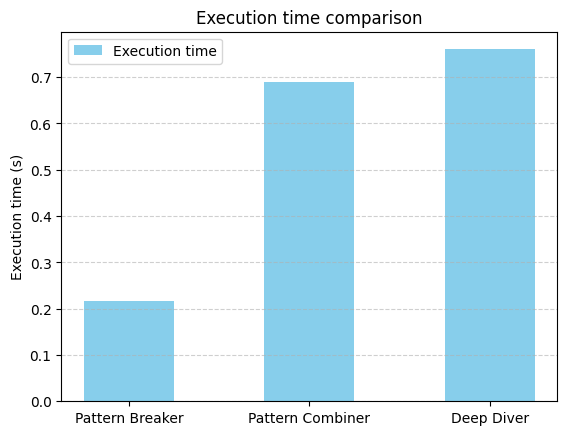

   Pattern Breaker  Pattern Combiner  Deep Diver
0          0.21752           0.68967    0.760104


In [23]:
# Time comparison (via graph)
import matplotlib.pyplot as plt
import numpy as np

# data
x = ['Pattern Breaker', 'Pattern Combiner', 'Deep Diver']
y = [pattern_breaker_time, pattern_combiner_time, deep_diver_time]

# plot
fig, ax = plt.subplots()
ax.bar(x, y, color='skyblue', align='center', width=0.5)
plt.ylabel('Execution time (s)')
plt.title('Execution time comparison')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Execution time'])
plt.show()

# Time comparison (via table)
import pandas as pd

data = {'Pattern Breaker': [pattern_breaker_time], 'Pattern Combiner': [pattern_combiner_time], 'Deep Diver': [deep_diver_time]}
df = pd.DataFrame(data)
print(df)

In [24]:
# Larger dataset
# Run all 3 algorithms against the larger dataset, and compare their execution
# times as done above

df = pd.read_csv('airbnb_100000.csv').dropna()
attributes = [1, 2, 3]
df = df.iloc[:, attributes]

#print few rows of the dataset
print(df.head())

#create array with cardinalities of each attribute
cardinalities = [len(df.iloc[:,i].unique()) for i in range(len(attributes))]
f'Attributes cardinalities:{cardinalities}'


  Accommodates Bathrooms  Bedrooms
0            4         1       1.0
1            4         2       3.0
2            4         1       1.0
3            6       2.5       2.0
4            2         1       1.0


'Attributes cardinalities:[24, 17, 11]'

In [ ]:
def run_algorithms(file_name, attributes, threshold):
    algorithm = PatternBreaker(file_name, threshold, attributes)
    start_time = time.time()
    mups_pattern_breaker = algorithm.find_max_uncovered_pattern_set()
    pattern_breaker_time = time.time() - start_time
    print(f'There are {len(mups_pattern_breaker)} MUPs!\n')
    print(f'Execution time: {pattern_breaker_time} seconds')
    for mup in mups_pattern_breaker:
        print(mup)

    algorithm = PatternCombiner(file_name, threshold, attributes)
    start_time = time.time()
    mups_pattern_combiner = algorithm.find_max_uncovered_pattern_set()
    pattern_combiner_time = time.time() - start_time
    print(f'There are {len(mups_pattern_combiner)} MUPs!\n')
    print(f'Execution time: {pattern_combiner_time} seconds')
    for mup in mups_pattern_combiner:
        print(mup)

    algorithm = DeepDiver(file_name, threshold, attributes)
    start_time = time.time()
    mups_deep_diver = algorithm.find_max_uncovered_pattern_set()
    deep_diver_time = time.time() - start_time
    print(f'There are {len(mups_deep_diver)} MUPs!\n')
    print(f'Execution time: {deep_diver_time} seconds')
    for mup in mups_deep_diver:
        print(mup)

    # Sanity check
    assert len(mups_pattern_breaker) == len(mups_pattern_combiner) == len(mups_deep_diver)

    # Time comparison (via graph)

    # data
    x = ['Pattern Breaker', 'Pattern Combiner', 'Deep Diver']
    y = [pattern_breaker_time, pattern_combiner_time, deep_diver_time]

    # plot
    fig, ax = plt.subplots()
    ax.bar(x, y, color='skyblue', align='center', width=0.5)
    plt.ylabel('Execution time (s)')
    plt.title('Execution time comparison')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(['Execution time'])
    plt.show()

There are 370 MUPs!

Execution time: 0.2777848243713379 seconds
2,7,x (cov:2)
5,4,2 (cov:0)
x,10,x (cov:2)
x,11,3 (cov:0)
3,6,x (cov:1)
10,x,3 (cov:2)
x,3,8 (cov:0)
0,x,5 (cov:0)
x,0,2 (cov:0)
12,11,x (cov:1)
6,14,x (cov:0)
1,2,x (cov:2)
1,13,x (cov:0)
9,4,x (cov:1)
4,14,x (cov:0)
14,x,x (cov:2)
12,1,x (cov:1)
12,12,x (cov:0)
5,1,1 (cov:1)
0,12,x (cov:0)
7,11,x (cov:1)
5,14,x (cov:0)
3,9,x (cov:0)
6,6,x (cov:1)
x,14,8 (cov:0)
11,1,x (cov:0)
11,12,x (cov:0)
x,6,4 (cov:0)
9,7,x (cov:0)
x,7,5 (cov:0)
11,x,0 (cov:0)
0,2,1 (cov:1)
12,4,x (cov:1)
1,x,8 (cov:0)
10,7,x (cov:0)
4,0,0 (cov:1)
x,11,2 (cov:1)
13,3,x (cov:0)
13,14,x (cov:0)
0,x,4 (cov:1)
x,14,3 (cov:2)
10,8,x (cov:1)
x,6,8 (cov:0)
11,4,x (cov:0)
5,7,x (cov:0)
x,7,0 (cov:0)
11,x,4 (cov:0)
1,5,x (cov:0)
5,1,0 (cov:2)
3,x,5 (cov:0)
4,6,x (cov:0)
0,13,x (cov:0)
x,2,6 (cov:0)
x,13,6 (cov:1)
x,5,2 (cov:1)
0,x,8 (cov:0)
2,2,x (cov:1)
8,13,x (cov:0)
x,6,3 (cov:2)
6,x,6 (cov:1)
6,9,x (cov:0)
0,2,0 (cov:1)
5,4,0 (cov:0)
x,13,1 (cov:1)
x,5,6 

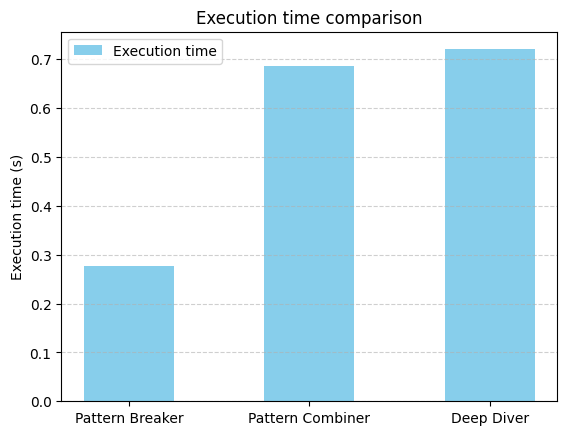

In [26]:
run_algorithms('airbnb_1000.csv', [1,2,3], 3)

There are 953 MUPs!

Execution time: 3.3839550018310547 seconds
5,12,6 (cov:1)
2,8,3 (cov:2)
5,4,2 (cov:0)
7,12,8 (cov:1)
13,1,2 (cov:1)
8,8,6 (cov:2)
x,11,3 (cov:0)
2,11,8 (cov:0)
16,2,x (cov:0)
3,7,6 (cov:0)
14,14,1 (cov:0)
19,x,x (cov:1)
10,16,x (cov:0)
14,14,10 (cov:0)
x,3,8 (cov:0)
7,13,0 (cov:1)
12,x,5 (cov:0)
9,13,2 (cov:0)
15,13,4 (cov:2)
17,12,x (cov:0)
0,x,5 (cov:1)
1,11,1 (cov:2)
18,8,x (cov:1)
11,2,2 (cov:0)
12,2,7 (cov:0)
17,x,0 (cov:0)
17,x,9 (cov:1)
7,8,6 (cov:1)
14,7,6 (cov:2)
4,4,3 (cov:0)
11,3,3 (cov:1)
5,0,9 (cov:1)
5,11,9 (cov:2)
x,7,1 (cov:0)
2,7,6 (cov:0)
17,13,x (cov:0)
x,7,10 (cov:2)
0,10,1 (cov:2)
8,11,7 (cov:1)
x,10,6 (cov:1)
12,13,3 (cov:0)
10,5,6 (cov:1)
0,12,x (cov:0)
10,15,x (cov:0)
12,5,8 (cov:1)
8,8,1 (cov:0)
2,8,7 (cov:0)
12,16,8 (cov:0)
6,0,4 (cov:2)
8,8,10 (cov:0)
14,14,5 (cov:0)
11,10,2 (cov:0)
14,6,10 (cov:0)
3,9,x (cov:1)
7,5,0 (cov:1)
7,16,0 (cov:0)
9,13,6 (cov:1)
9,5,2 (cov:0)
2,12,4 (cov:0)
7,16,9 (cov:1)
0,x,9 (cov:2)
17,4,x (cov:0)
14,15,6 (co

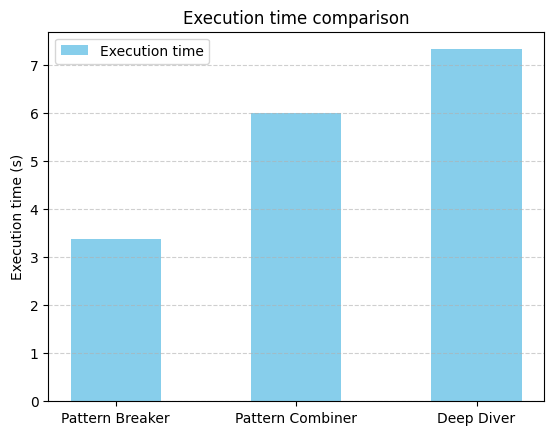

In [27]:
run_algorithms('airbnb_100000.csv', [1,2,3], 3)

In [28]:
# run_algorithms('airbnb_100000.csv', [1,2,3,4,5,6])